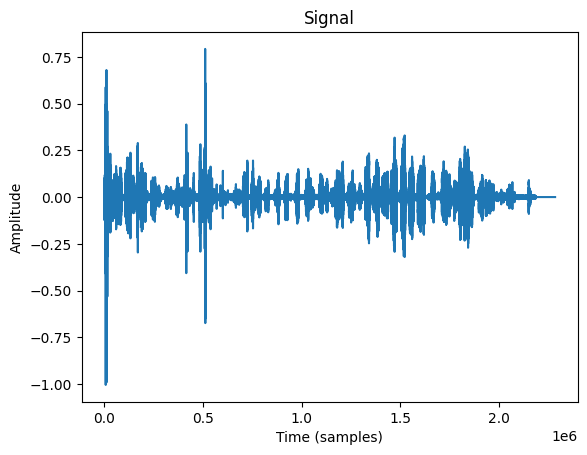

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('-sTnP0BeOS4_30.wav')

plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

In [1]:
import pandas as pd
import numpy as np

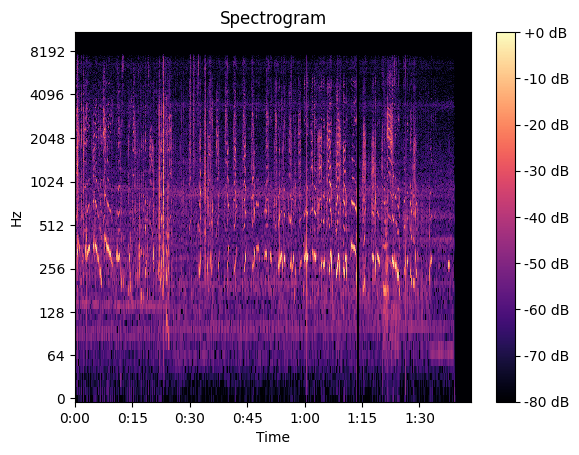

In [3]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

In [2]:
# 관련 라이브러리 가져오기
import matplotlib.pyplot as plt

import os
from glob import glob
import pandas as pd
import numpy as np


In [5]:
# glob: 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
base_dir = './source/caterwaul'
train_folder = glob(base_dir)

train_path = []
print(train_folder)
for folder in train_folder:
    tmp = glob(folder + '/*')
    train_path += tmp

['./source/caterwaul']


In [6]:
print(len(train_path))

267


In [8]:

# ti = 0
# for i in range(len(train_path)):
#     #librosa.get_duration(filename='train_path[i]')
#     ti+= librosa.get_duration(filename=train_path[i])
#     if i%100==0:
#         print(i)
# print(ti)


In [9]:
49102.238500000014+16202.77149999999

65305.01

In [7]:
print(train_path)

['./source/caterwaul\\--KCIeTv6PM_18.wav', './source/caterwaul\\-2--Xzix2Vk_0.wav', './source/caterwaul\\-2kErLFAk5k_30.wav', './source/caterwaul\\-3qVzrEZ8l0_30.wav', './source/caterwaul\\-46xqouqMxA_6.wav', './source/caterwaul\\-68677bCJWM_16.wav', './source/caterwaul\\-CHwctXCRJk_30.wav', './source/caterwaul\\-D6DyrLZuQQ_30.wav', './source/caterwaul\\-FL784R2DJk_21.wav', './source/caterwaul\\-GlVOPNJC9I_30.wav', './source/caterwaul\\-Hh5VlW3pFE_30.wav', './source/caterwaul\\-HJxeIFmUd0_30.wav', './source/caterwaul\\-I2wwE7WFOU_24.wav', './source/caterwaul\\-J0tFSi23DE_30.wav', './source/caterwaul\\-Ln9HQ6lLtI_50.wav', './source/caterwaul\\-ltwWPplUzg_30.wav', './source/caterwaul\\-MGLODOozpU_30.wav', './source/caterwaul\\-m_rnUuUliM_3.wav', './source/caterwaul\\-N2-lx8ToAY_0.wav', './source/caterwaul\\-nBJVvyLiK8_10.wav', './source/caterwaul\\-pZ9JyrIiMM_30.wav', './source/caterwaul\\-rGHegPzCpc_30.wav', './source/caterwaul\\-rZs9OJ21mk_0.wav', './source/caterwaul\\-TYGdSo47xo_30.wa

In [10]:
for vidno in range(len(train_path)):
    if train_path[vidno]=='./source/meow\\2k_PMtUzetw_30.wav':
        print(vidno)

277


In [9]:
train_path = ['./387.wav']

./387.wav


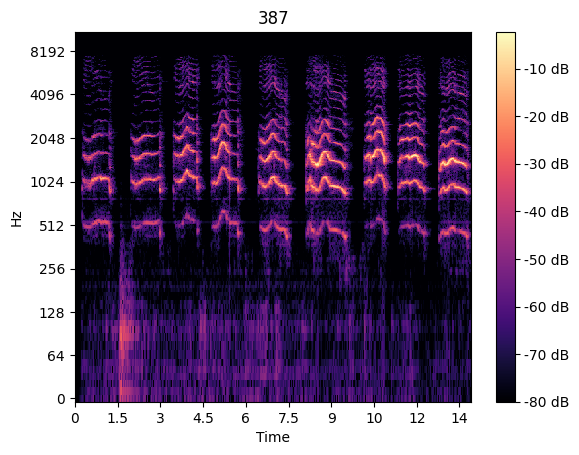

In [10]:
vidno=0
y, sr = librosa.load(train_path[vidno])
print(train_path[vidno])
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec[:,:600], sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title(train_path[vidno].split('/')[-1].split('.')[0]);

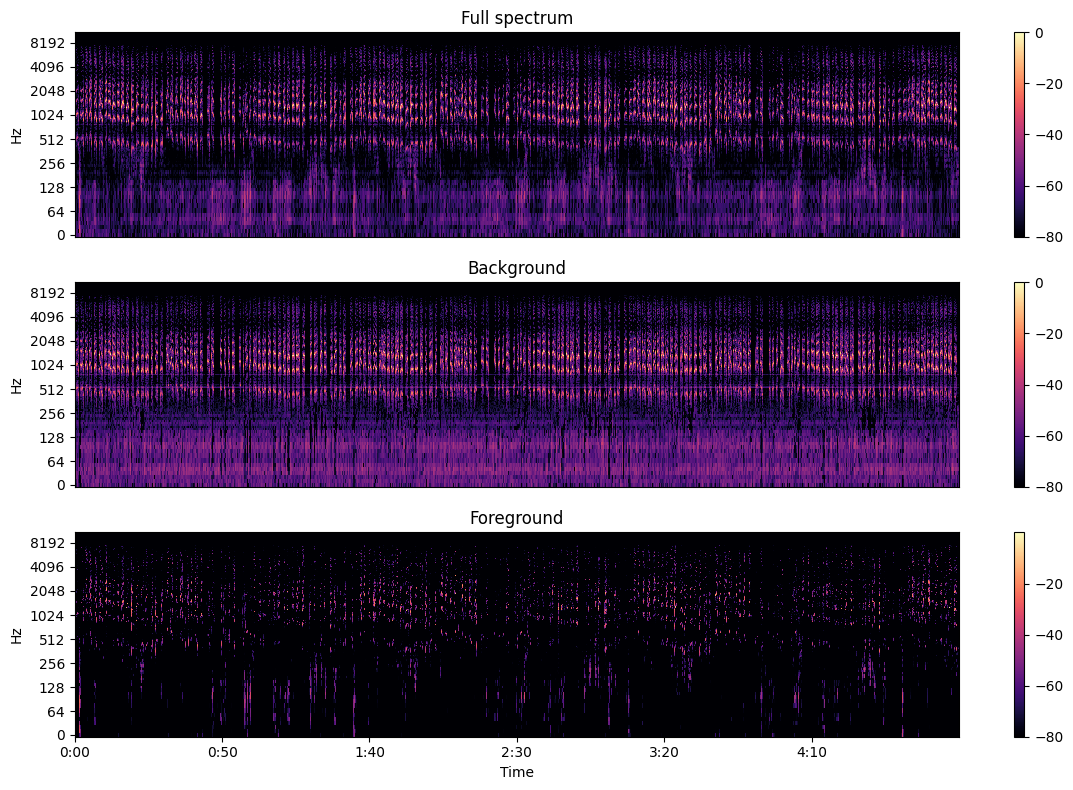

In [11]:

S_full, phase = librosa.magphase(librosa.stft(y))



# We'll compare frames using cosine similarity, and aggregate similar frames
# by taking their (per-frequency) median value.
#
# To avoid being biased by local continuity, we constrain similar frames to be
# separated by at least 2 seconds.
#
# This suppresses sparse/non-repetetitive deviations from the average spectrum,
# and works well to discard vocal elements.

S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

# The output of the filter shouldn't be greater than the input
# if we assume signals are additive.  Taking the pointwise minimium
# with the input spectrum forces this.
S_filter = np.minimum(S_full, S_filter)
# We can also use a margin to reduce bleed between the vocals and instrumentation masks.
# Note: the margins need not be equal for foreground and background separation
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

# Once we have the masks, simply multiply them with the input spectrum
# to separate the components
S_foreground = mask_v * S_full
S_background = mask_i * S_full
# sphinx_gallery_thumbnail_number = 2

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_background, ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_foreground, ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.title('Foreground')
plt.colorbar()
plt.tight_layout()
plt.show()

In [12]:
def ctft_to_peaks(carr : np.ndarray, threshold = 1, max_peak_num = 10):
    rising = np.zeros(shape=(max_peak_num, carr.shape[1]))
    falling = np.zeros(shape=(max_peak_num , carr.shape[1]))
    diff=np.diff(np.sign(carr.T-threshold), axis = 1)

    for arr, num in [(rising, 2), (falling, -2)]:
        a,b = np.where(diff==num)
        for i in range(diff.shape[0]):
            temp=b[a==i]
            minlen = min(max_peak_num, len(temp))
            arr[:minlen,i]=temp[:minlen]

    return (rising, falling)

In [19]:
from scipy.signal import convolve2d
S_smoothed = convolve2d(S_foreground, np.ones(3).reshape((1,-1))/5)

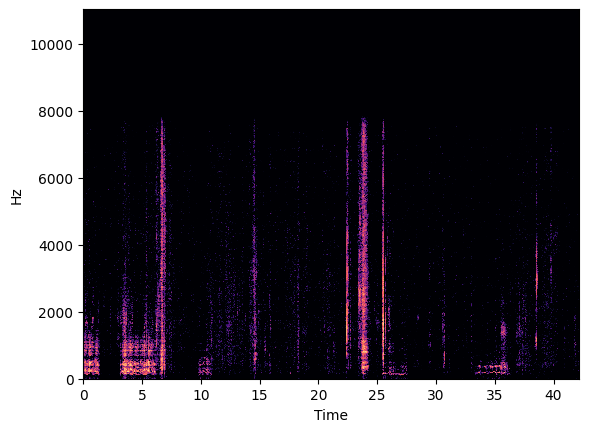

In [20]:
librosa.display.specshow(librosa.amplitude_to_db(S_smoothed, ref=np.max),
                         y_axis='hz', x_axis='time', sr=sr)

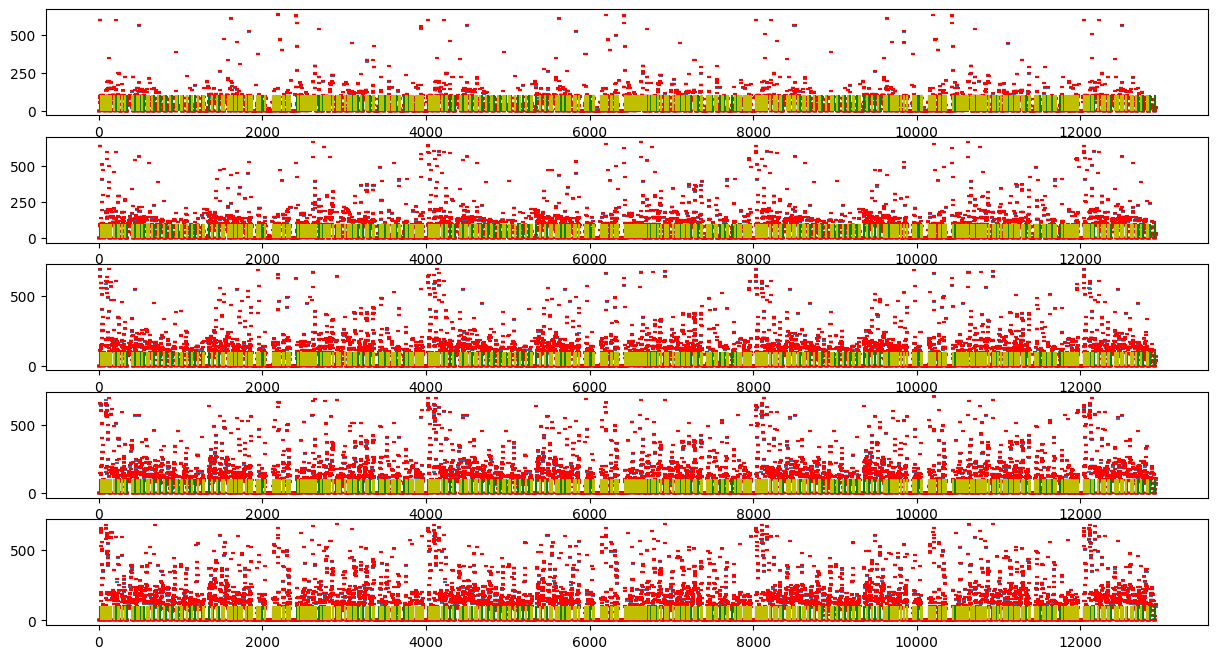

In [13]:
rising, falling = ctft_to_peaks(S_foreground, threshold=0.1, max_peak_num=5)

x=np.arange(0, rising.shape[1],1/1).astype(int)
plt.figure(figsize=(15,8))

#의미있는 부분만 잘라내기
cnt_mat = (rising > 1e-5).sum(axis=0)
thres = 5 - 0.5
cutpoint_rising = np.where(np.diff(np.sign(cnt_mat-thres))==2)[0]
cutpoint_falling = np.where(np.diff(np.sign(cnt_mat-thres))==-2)[0]+1
if(cnt_mat[0] > thres):
    cutpoint_rising = np.insert(cutpoint_rising,0,0)
if len(cutpoint_rising)!=len(cutpoint_falling):
        cutpoint_falling = cutpoint_falling[:-1]
for num in range(5):
    rising_2 = rising[num,:]
    falling_2 = falling[num,:]
    plt.subplot(5,1,num+1)
    plt.scatter(x[:], rising_2[:], s=10, marker='_')
    plt.scatter(x[:], falling_2[:], s=10, marker='_', c='r')
    plt.vlines(x=cutpoint_rising, ymin=0, ymax= 100,color='g')
    plt.vlines(x=cutpoint_falling, ymin=0, ymax= 100,color='y')

In [22]:
# for num in range(len(cutpoint_rising)):
#     #print(librosa.frames_to_time(cutpoint_rising[num],sr=sr), librosa.frames_to_time(cutpoint_falling[num],sr=sr))
#     pass
# print(len(cutpoint_rising))
# print(cutpoint_rising)
# print(cutpoint_falling)

In [23]:
print(len(cutpoint_rising))

27


In [24]:
print(len(cutpoint_falling))

27


In [25]:
print(cutpoint_rising)

[   0   39   54  134  141  182  206  213  248  260  265  273  281  449
  454  625  961 1006 1016 1095 1105 1119 1320 1528 1533 1536 1656]


In [26]:
print(cutpoint_falling)

[  38   54   56  136  181  202  213  247  259  263  271  275  300  454
  457  630  971 1016 1043 1101 1109 1122 1323 1532 1536 1545 1663]


In [27]:
print(np.sign(cnt_mat-thres)[-30:])

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [28]:
print(len(np.sign(cnt_mat-thres)))

1815


In [14]:
for i in range(len(cutpoint_rising)):
    if 1.3>=(librosa.frames_to_time(cutpoint_falling[i],sr=sr)-librosa.frames_to_time(cutpoint_rising[i],sr=sr))>=0.3:
        #print(cutpoint_rising[i], cutpoint_falling[i])
        print(("ffmpeg -y -ss " + str(librosa.frames_to_time(cutpoint_rising[i],sr=sr)) + " -t " + str(librosa.frames_to_time(cutpoint_falling[i],sr=sr)-librosa.frames_to_time(cutpoint_rising[i],sr=sr)) + " -i " +str(train_path[vidno])+" ./test/"+str(train_path[vidno].split('/')[-1].split(".")[0])+'_'+str(i)+".wav"))
        os.system(("ffmpeg -y -ss " + str(librosa.frames_to_time(cutpoint_rising[i],sr=sr)) + " -t " + str(librosa.frames_to_time(cutpoint_falling[i],sr=sr)-librosa.frames_to_time(cutpoint_rising[i],sr=sr)) + " -i " +str(train_path[vidno])+" ./test/"+str(train_path[vidno].split('/')[-1].split(".")[0])+'_'+str(i)+".wav"))

ffmpeg -y -ss 2.2523356009070294 -t 0.4411791383219956 -i ./387.wav ./test/387_14.wav
ffmpeg -y -ss 3.4829931972789114 -t 0.8823582766439908 -i ./387.wav ./test/387_17.wav
ffmpeg -y -ss 4.806530612244898 -t 0.7430385487528346 -i ./387.wav ./test/387_18.wav
ffmpeg -y -ss 6.594467120181406 -t 0.719818594104308 -i ./387.wav ./test/387_23.wav
ffmpeg -y -ss 8.103764172335602 -t 1.2306575963718807 -i ./387.wav ./test/387_25.wav
ffmpeg -y -ss 10.216780045351474 -t 0.7430385487528355 -i ./387.wav ./test/387_28.wav
ffmpeg -y -ss 11.563537414965987 -t 0.7430385487528337 -i ./387.wav ./test/387_30.wav
ffmpeg -y -ss 12.817414965986394 -t 0.9752380952380957 -i ./387.wav ./test/387_31.wav
ffmpeg -y -ss 14.373151927437641 -t 0.8359183673469399 -i ./387.wav ./test/387_33.wav
ffmpeg -y -ss 15.74312925170068 -t 1.0681179138322001 -i ./387.wav ./test/387_34.wav
ffmpeg -y -ss 17.2756462585034 -t 1.0913378684807284 -i ./387.wav ./test/387_35.wav
ffmpeg -y -ss 19.11002267573696 -t 1.137777777777778 -i ./387

IndexError: index 557 is out of bounds for axis 0 with size 557